In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
df = pd.read_csv("Telecom customer.csv")

In [3]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [4]:
df.shape

(7043, 21)

In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [8]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [9]:
df.dropna(inplace=True)

In [10]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [11]:
df.drop(columns=['customerID'], inplace=True)

In [12]:
df.drop_duplicates(inplace=True)
print("Shape After Cleaning:", df.shape)

Shape After Cleaning: (7010, 20)


C:\Users\rohit\AppData\Local\Temp\ipykernel_25356\1543182168.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Churn', palette='Set2')


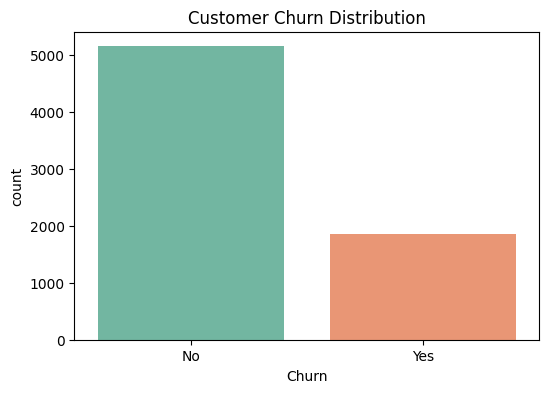

In [15]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Churn', palette='Set2')
plt.title('Customer Churn Distribution')
plt.show()

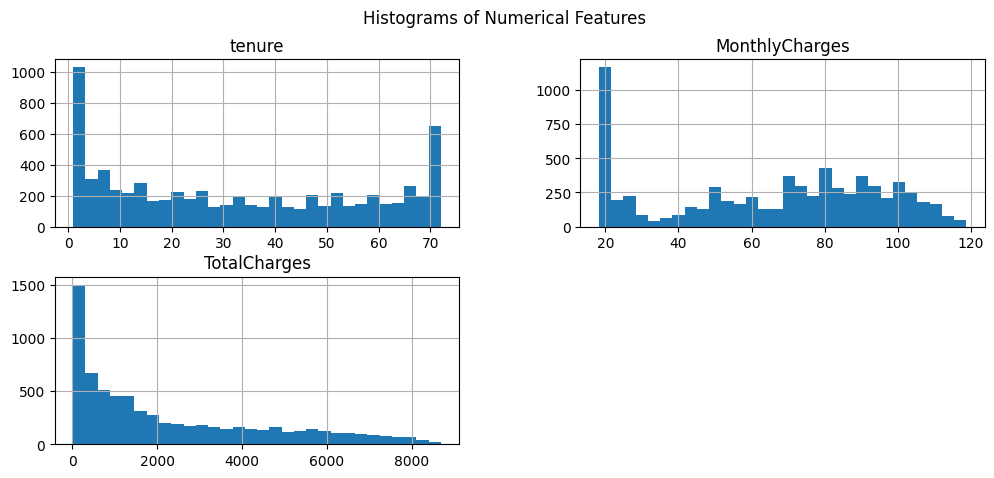

In [16]:
num_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[num_features].hist(figsize=(12, 5), bins=30)
plt.suptitle("Histograms of Numerical Features")
plt.show()

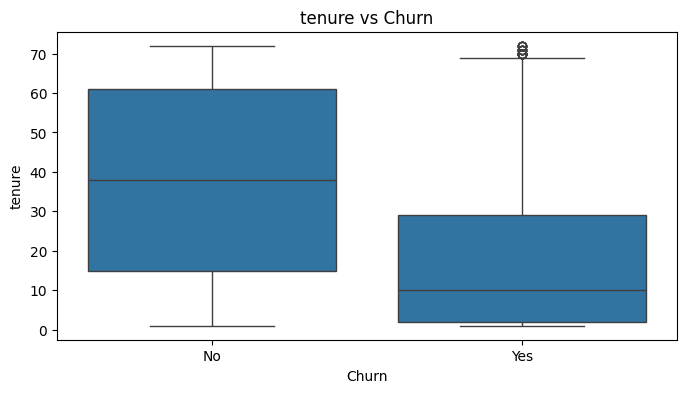

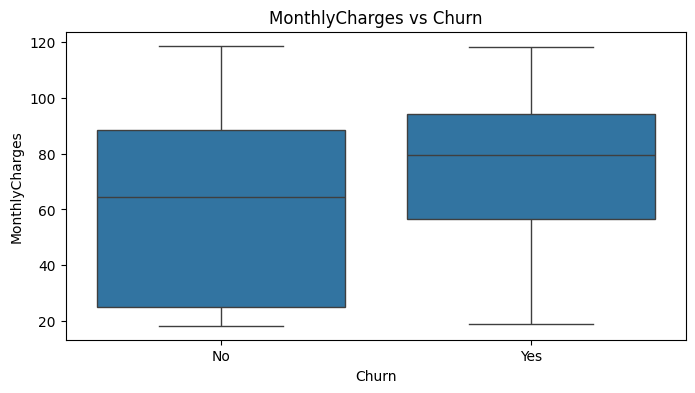

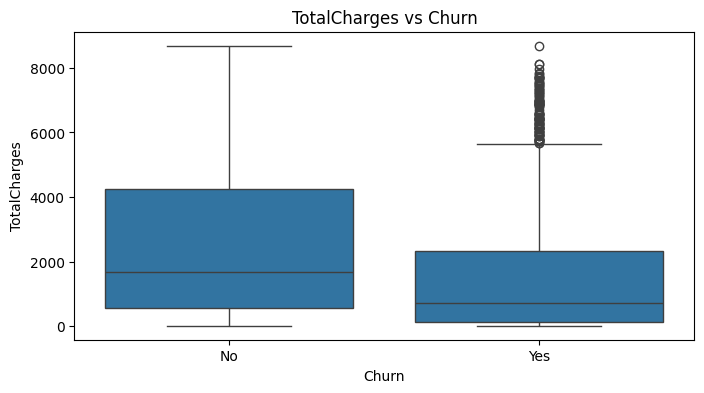

In [17]:
for col in num_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x='Churn', y=col)
    plt.title(f'{col} vs Churn')
    plt.show()

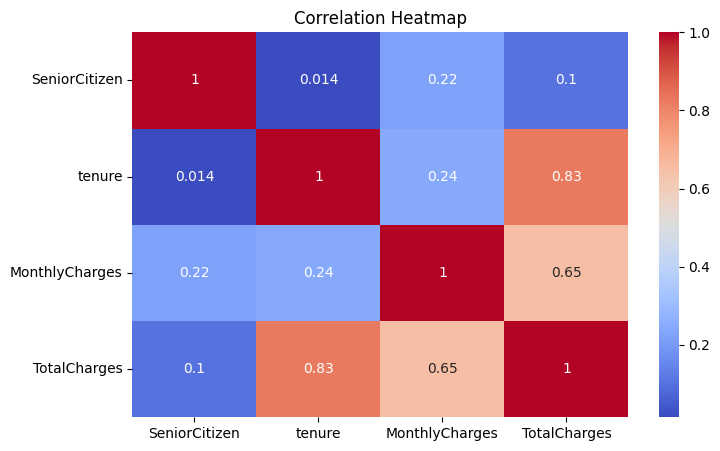

In [18]:
plt.figure(figsize=(8, 5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

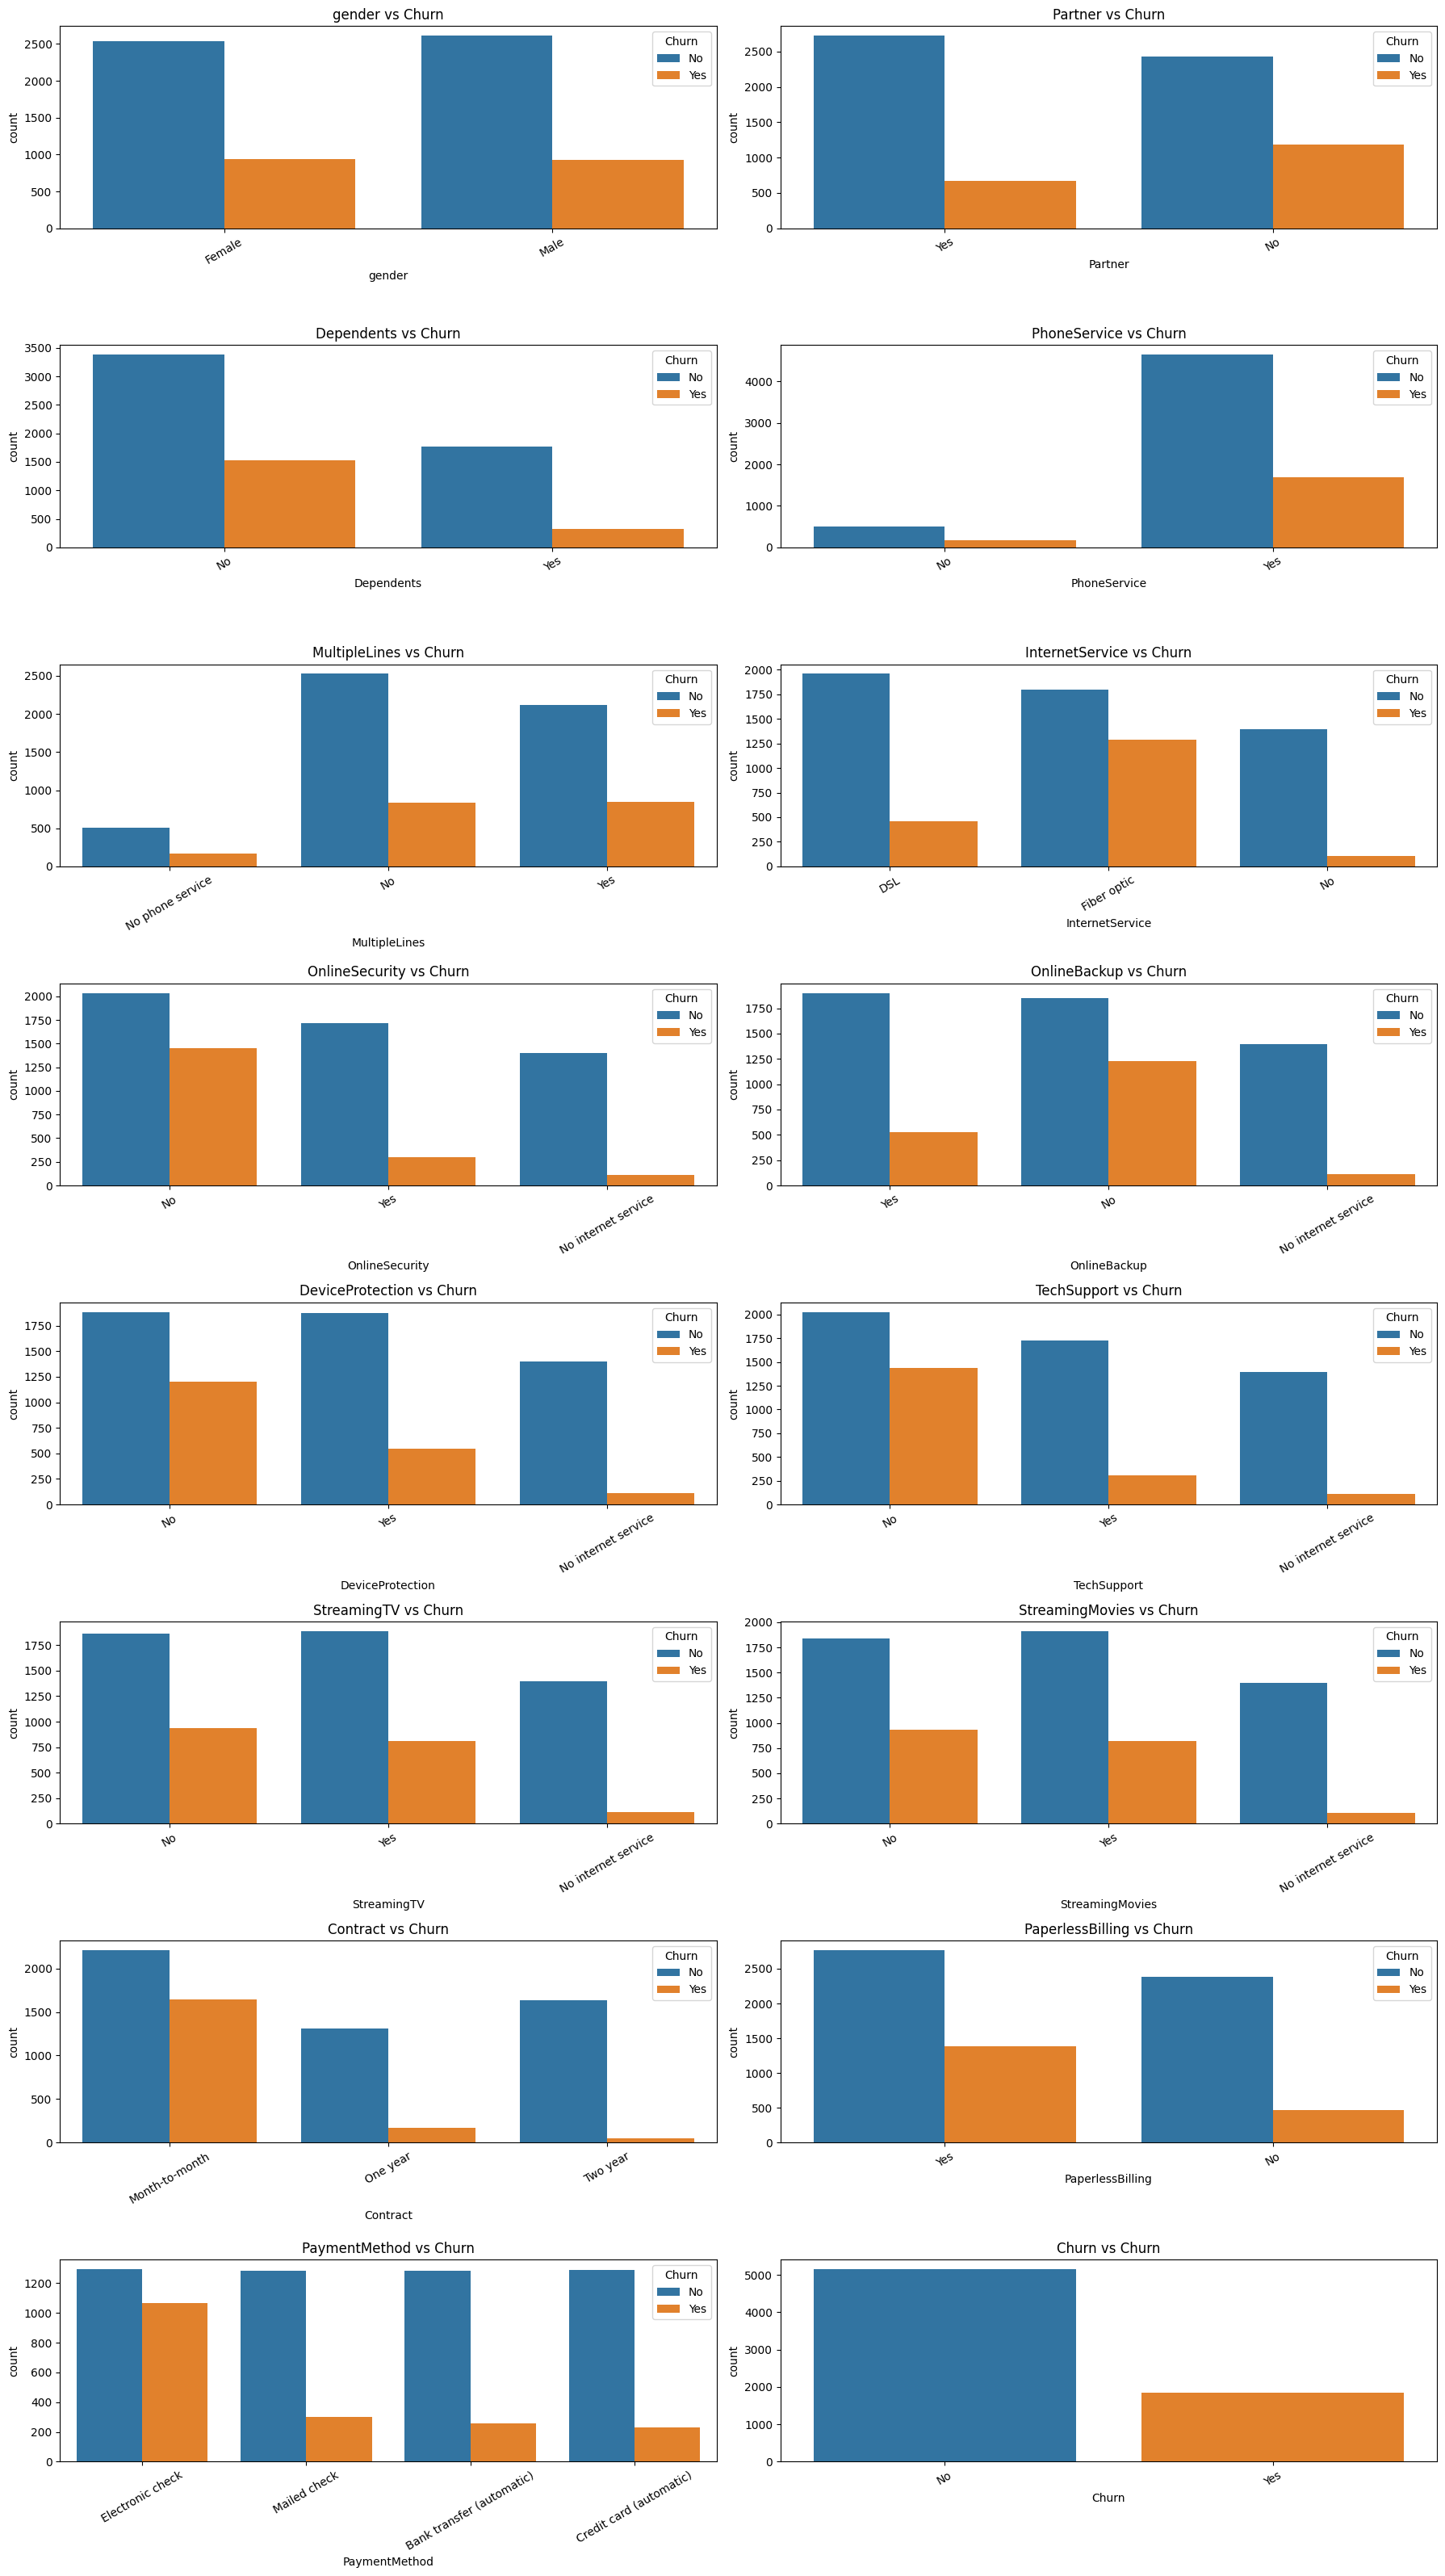

In [21]:
cat_features = df.select_dtypes(include='object').columns.tolist()
num_plots = len(cat_features)
cols = 2
rows = (num_plots + 1) // cols 
plt.figure(figsize=(18, rows * 4))  
for i, col in enumerate(cat_features):
    plt.subplot(rows, cols, i + 1)
    sns.countplot(data=df, x=col, hue='Churn')
    plt.xticks(rotation=30)
    plt.title(f'{col} vs Churn')
plt.tight_layout()
plt.show()

In [22]:
le = LabelEncoder()
for col in cat_features:
    df[col] = le.fit_transform(df[col])

In [23]:
X = df.drop('Churn', axis=1)
y = df['Churn']

In [24]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [26]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [27]:
y_pred = model.predict(X_test)

In [29]:
print("\nAccuracy\n", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report\n", classification_report(y_test, y_pred))


Accuracy
 0.7881597717546363

Confusion Matrix
 [[933  98]
 [199 172]]

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.90      0.86      1031
           1       0.64      0.46      0.54       371

    accuracy                           0.79      1402
   macro avg       0.73      0.68      0.70      1402
weighted avg       0.77      0.79      0.78      1402



In [30]:
df['Churn'].value_counts(normalize=True)

Churn
0    0.735093
1    0.264907
Name: proportion, dtype: float64

In [31]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X, y)

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200],     
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5]      
}
grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=5,            
    scoring='accuracy'   
)
grid.fit(X_train, y_train)
print("✅ Best parameters found:", grid.best_params_)
best_model = grid.best_estimator_

✅ Best parameters found: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}


In [33]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = best_model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1031
           1       0.66      0.52      0.58       371

    accuracy                           0.80      1402
   macro avg       0.75      0.71      0.73      1402
weighted avg       0.79      0.80      0.79      1402



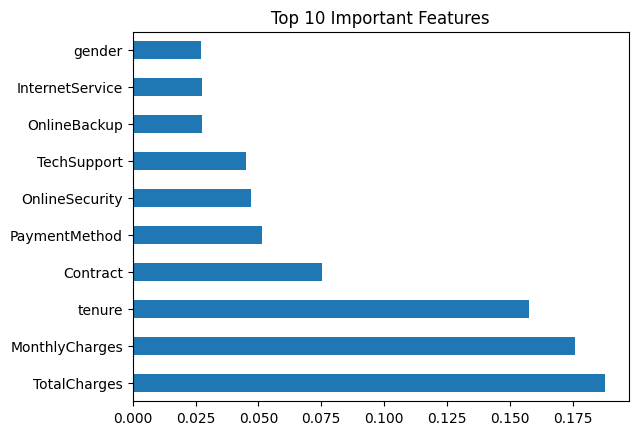

In [34]:
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Important Features")
plt.show()

In [35]:
import joblib
joblib.dump(model, "churn_model.pkl")

['churn_model.pkl']